# Package

In [1]:
from emcee_rapper.mcmcwrapper import MCMCWrapper
import numpy as np
import matplotlib.pyplot as plt

# Linear Fit

In [2]:
def linear_fit(pars, x):
    m, b0 = pars
    return m*x + b0

In [3]:
true_params = [2.0, -1.0]
x_data = np.linspace(-5, 5, 100)
y_true = linear_fit(true_params, x_data)
np.random.seed(42)
y_obs = y_true + np.random.normal(0, 1.0, size=len(x_data))

parnames = ["m", "b0"]
initial_guess = [1.0, 0.0]
prior_bounds = [[-10, 10], [-10, 10]]
noise_std = 1.0

wrapper = MCMCWrapper(
    model_function=linear_fit,
    data=y_obs,
    x=x_data,
    parnames=parnames,
    initial_values=initial_guess,
    prior_bounds=prior_bounds,
    noise=noise_std
)

sampler = wrapper.run_mcmc(nwalkers=30, nsteps=1000)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1036.07it/s]

m: 2.016 (+0.035/-0.035)
b0: -1.104 (+0.101/-0.098)


## Best Fit

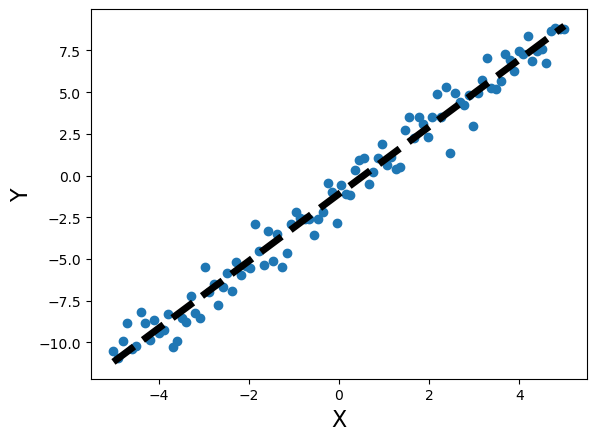

In [5]:
samples = sampler.get_chain(discard=200, thin=15, flat=True)

medians = np.median(samples, axis=0)

fig, ax = plt.subplots()
ax.plot(x_data,y_obs, 'o')
ax.plot(x_data, linear_fit([medians[0], medians[1]], x_data), 'k--', lw=5)
plt.xlabel('X', size=16)
plt.ylabel('Y', size=16)
plt.show()

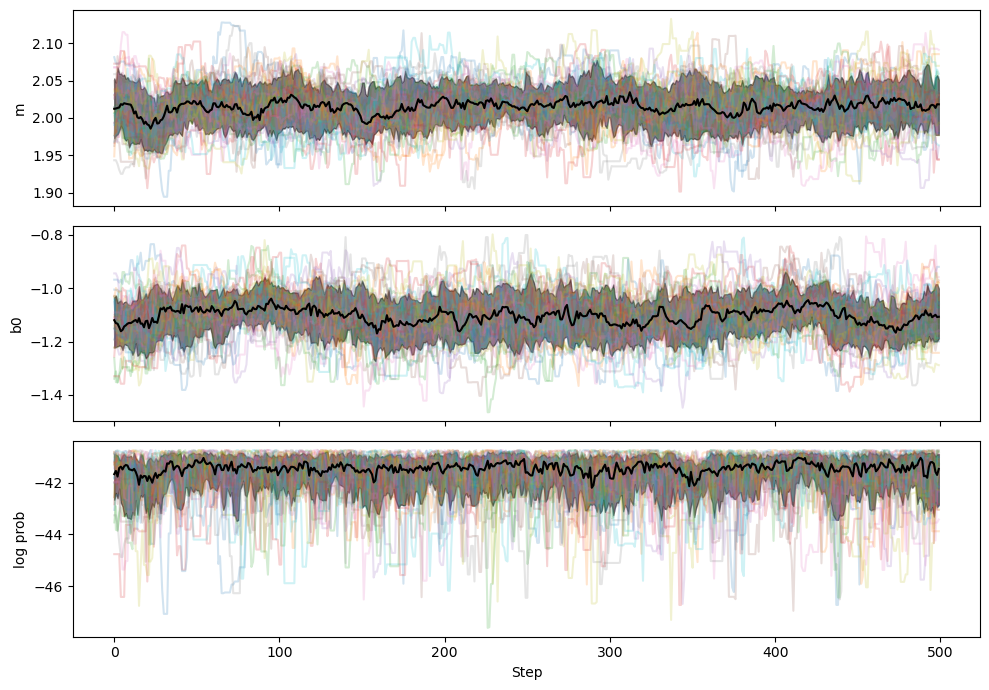

In [6]:
wrapper.walker_plot(discard=500)

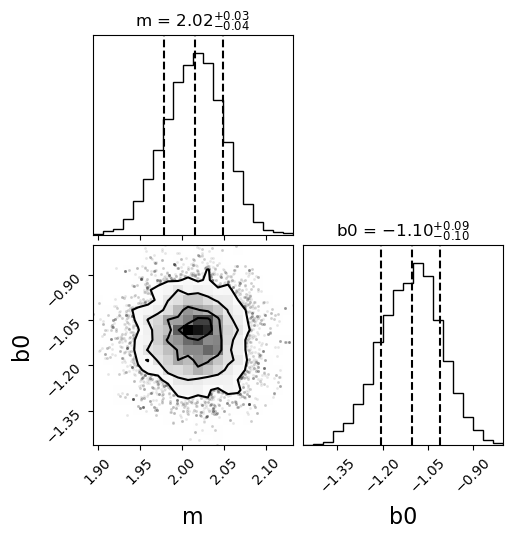

In [7]:
wrapper.corner_plot(discard = 500)

# Quadratic Fit

In [9]:
def quadratic_fit(pars, x):
    a, b, c = pars
    return a * x**2 + b * x + c

true_params = [2.0, -1.0, 0.5]
x_data = np.linspace(-5, 5, 100)
y_true = quadratic_fit(true_params, x_data)
np.random.seed(42)
y_obs = y_true + np.random.normal(0, 1.0, size=len(x_data))

parnames = ["a", "b", "c"]
initial_guess = [1.0, 0.0, 0.0]
prior_bounds = [[-10, 10], [-10, 10], [-10, 10]]
noise_std = 1.0

wrapper = MCMCWrapper(
    model_function=quadratic_fit,
    data=y_obs,
    x=x_data,
    parnames=parnames,
    initial_values=initial_guess,
    prior_bounds=prior_bounds,
    noise=noise_std,
    priortype='uniform'
)

sampler = wrapper.run_mcmc(nwalkers=30, nsteps=1000)

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 914.64it/s]

a: 2.008 (+0.013/-0.014)
b: -0.986 (+0.034/-0.038)
c: 0.334 (+0.147/-0.157)


## Best Fit

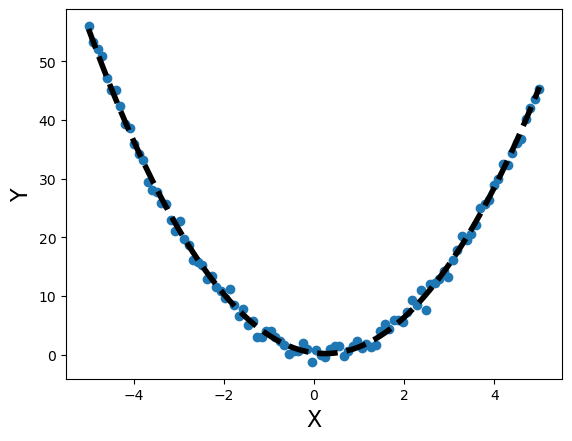

In [11]:
samples = sampler.get_chain(discard=200, thin=15, flat=True)

medians = np.median(samples, axis=0)

plt.plot(x_data,y_obs, 'o')
plt.plot(x_data, quadratic_fit([medians[0], medians[1], medians[2]], x_data), lw=4, ls='--', color='k')
plt.xlabel('X', size=16)
plt.ylabel('Y', size=16)
plt.show()

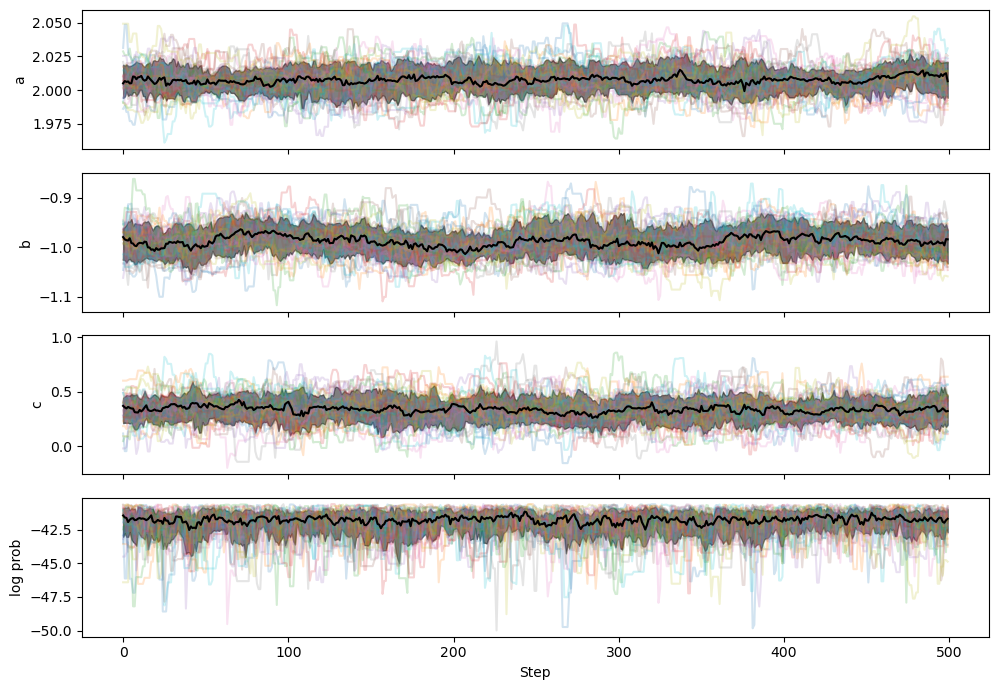

In [12]:
wrapper.walker_plot(discard=500)

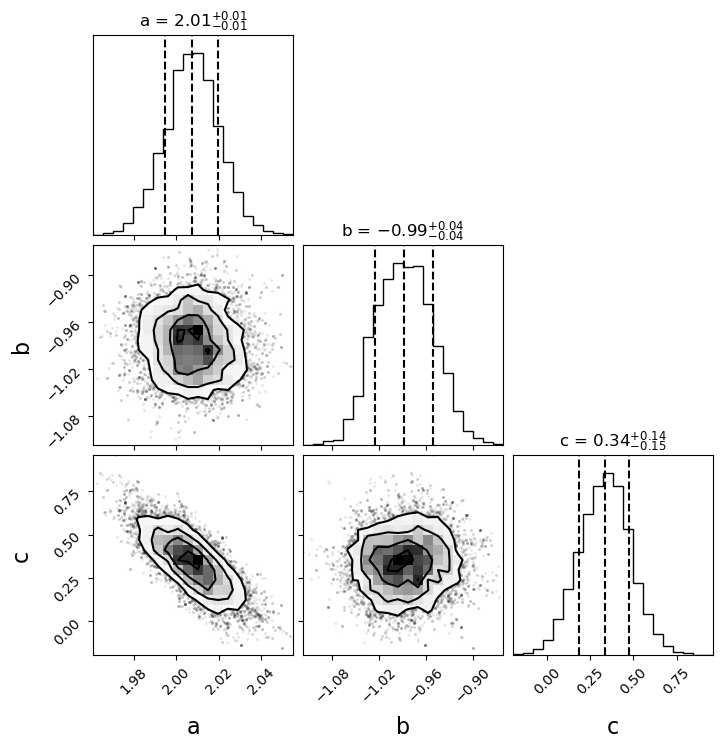

In [13]:
wrapper.corner_plot(discard = 500)

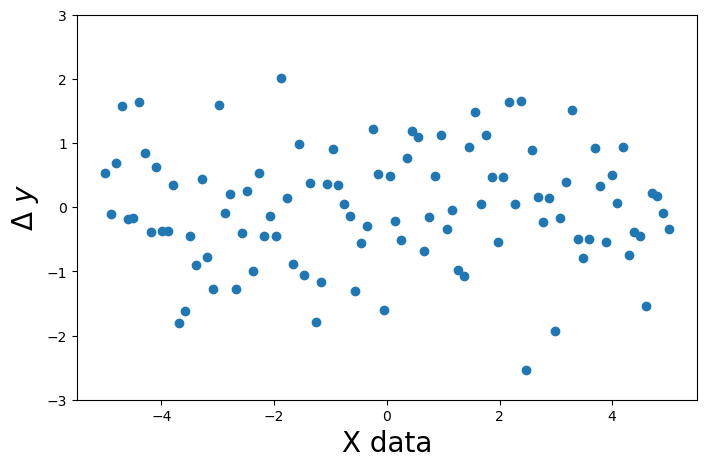

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x_data, y_obs- quadratic_fit([medians[0], medians[1], medians[2]], x_data), 'o')
plt.ylim(-3,3)
ax.set_xlabel('X data',size=20)
ax.set_ylabel(r'$\Delta~y$',size=20)
plt.show()